# Optimization problems, objective functions and optimization benchmarks

**TODO**:

* Vérifier pour chaque fonction si `x.dtype` est un entier, le résultat n'est pas altéré (si non, utiliser `x = x.astype(np.float)`).
* Vérifier pour chaque fonction que l'évaluation multi-point donne le même résultat que l'évaluation mono-point.

**Remarque**:

Pour l'évaluation simultanée des points $x_1$, $x_2$ et $x_3$:

$x_1 = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$
$x_2 = \begin{pmatrix} 1 \\ 1 \end{pmatrix}$
$x_3 = \begin{pmatrix} 2 \\ 2 \end{pmatrix}$

`x` doit être codé `x = np.array([[0, 1, 2], [0, 1, 2]])` et non pas `x = np.array([[0, 0], [1, 1], [2, 2]])` dans le code Python car ça simplifie grandement la définition des fonctions (avec le premier codage il n'est pas nécessaire de se préoccuper du nombre de point).

Par exemple, pour la fonction sphère, avec le 2nd codage il faudrait écrire:

```
if x.ndim == 1:
    return np.sum(x**2)
else:
    return np.sum(x**2, axis=1)
```

alors qu'avec le 1er codage, il suffit décrire:

```
return np.sum(x**2, axis=0)
```

ou plus simplement:

```
return sum(x**2)
```

sans avoir à se préocupper de la dimension de `x` (i.e. on se débrouille pour que toutes les oppérations d'aggrégation soit faites sur `axis=0` ainsi le même code marche quand `x.ndim=1` et quand `x.ndim=2`).

In [1]:
%matplotlib inline

import numpy as np

import matplotlib
matplotlib.rcParams['figure.figsize'] = (8, 8)

import math

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

import scipy.optimize

In [2]:
def plot_2d_contour_solution_space(func,
                                   xmin=-np.ones(2),
                                   xmax=np.ones(2),
                                   xstar=None,
                                   title="",
                                   vmin=None,
                                   vmax=None,
                                   zlog=True):
    """TODO
    """
    fig, ax = plt.subplots(figsize=(12, 8))

    x1_space = np.linspace(xmin[0], xmax[0], 200)
    x2_space = np.linspace(xmin[1], xmax[1], 200)
    
    x1_mesh, x2_mesh = np.meshgrid(x1_space, x2_space)

    zz = func(np.array([x1_mesh.ravel(), x2_mesh.ravel()])).reshape(x1_mesh.shape)
    
    ############################
    
    if xstar.ndim == 1:
        min_value = func(xstar)
    else:
        min_value = min(func(xstar))
    max_value = zz.max()
    
    if vmin is None:
        if zlog:
            vmin = 0.1             # TODO
        else:
            vmin = min_value
        
    if vmax is None:
        vmax = max_value
        
    if zlog:
        norm = colors.LogNorm()
    else:
        norm = None
    
    levels = np.logspace(0.1, 3., 5)          # TODO

    im = ax.pcolormesh(x1_mesh, x2_mesh, zz,
                       vmin=vmin,
                       vmax=vmax,
                       norm=norm,
                       shading='gouraud',
                       cmap='gnuplot2') # 'jet' # 'gnuplot2'

    plt.colorbar(im, ax=ax)

    cs = plt.contour(x1_mesh, x2_mesh, zz, levels,
                     linewidths=(2, 2, 2, 2, 3),
                     linestyles=('dotted', '-.', 'dashed', 'solid', 'solid'),
                     alpha=0.5,
                     colors='white')
    ax.clabel(cs, inline=False, fontsize=12)

    ############################

    if xstar is not None:
        ax.scatter(xstar[0],
                   xstar[1],
                   c='red',
                   label="$x^*$")

    ax.set_title(title)

    ax.set_xlabel(r"$x_1$")
    ax.set_ylabel(r"$x_2$")

    ax.legend(fontsize=12)

    plt.show()

In [3]:
def plot_2d_solution_space(func,
                           xmin=-np.ones(2),
                           xmax=np.ones(2),
                           xstar=None,
                           angle_view=None,
                           title="",
                           zlog=True):
    """TODO
    """
    fig = plt.figure(figsize=(12, 8))
    ax = axes3d.Axes3D(fig)
    
    if angle_view is not None:
        ax.view_init(angle_view[0], angle_view[1])

    x1_space = np.linspace(xmin[0], xmax[0], 100)
    x2_space = np.linspace(xmin[1], xmax[1], 100)
    
    x1_mesh, x2_mesh = np.meshgrid(x1_space, x2_space)

    zz = func(np.array([x1_mesh.ravel(), x2_mesh.ravel()])).reshape(x1_mesh.shape)   # TODO

    ############################
    
    if zlog:
        norm = colors.LogNorm()
    else:
        norm = None
        
    surf = ax.plot_surface(x1_mesh,
                           x2_mesh,
                           zz,
                           cmap='gnuplot2', # 'jet' # 'gnuplot2'
                           norm=norm,
                           rstride=1,
                           cstride=1,
                           #color='b',
                           shade=False)

    ax.set_zlabel(r"$f(x_1, x_2)$")

    fig.colorbar(surf, shrink=0.5, aspect=5)

    ############################

    if xstar is not None:
        ax.scatter(xstar[0],
                   xstar[1],
                   func(xstar),
                   #s=50,          # TODO
                   c='red',
                   alpha=1,
                   label="$x^*$")
    
    ax.set_title(title)
    
    ax.set_xlabel(r"$x_1$")
    ax.set_ylabel(r"$x_2$")

    ax.legend(fontsize=12)
    
    plt.show()

## Type of optimization problems

* **continuous** vs **discrete** problems (possibly **combinatorial** if the set of solutions is discrete and very big)
* **unconstrained** vs **constrained** problems
* **deterministic** vs **stochastic** problems
* **convex** vs **non-convex** problems
* **unimodal** vs **multimodal** problems
* **single-objective** vs **multi-objective** problems
* **differentiable** vs **nondifferentiable** problems
* **linear** vs **nonlinear** problems
* **quadratic** vs **nonquadratic** problems
* **derivative-free** problems
* **multistage** problems

Linear Programming (LP)
Mixed Integer Nonlinear Programming (MINLP)
Quadratically Constrained Quadratic Programming (QCQP)
Quadratic Programming (QP)

https://neos-guide.org/content/optimization-tree-alphabetical

https://en.wikipedia.org/wiki/Derivative-free_optimization

https://en.wikipedia.org/wiki/List_of_types_of_functions

### Remark: unimodal does not imply convex...

Unimodal does not imply convex. For instance, $f(x_1, x_2) = \sqrt{|x_1|} + \sqrt{|x_2|}$ is unimodal but not convex.

See https://math.stackexchange.com/questions/1452657/how-to-prove-quasi-convex-if-and-only-if-unimodal for more information.

In [4]:
def unimodal_but_not_convex_example(x):
    return np.sqrt(np.abs(x[0])) + np.sqrt(np.abs(x[1]))

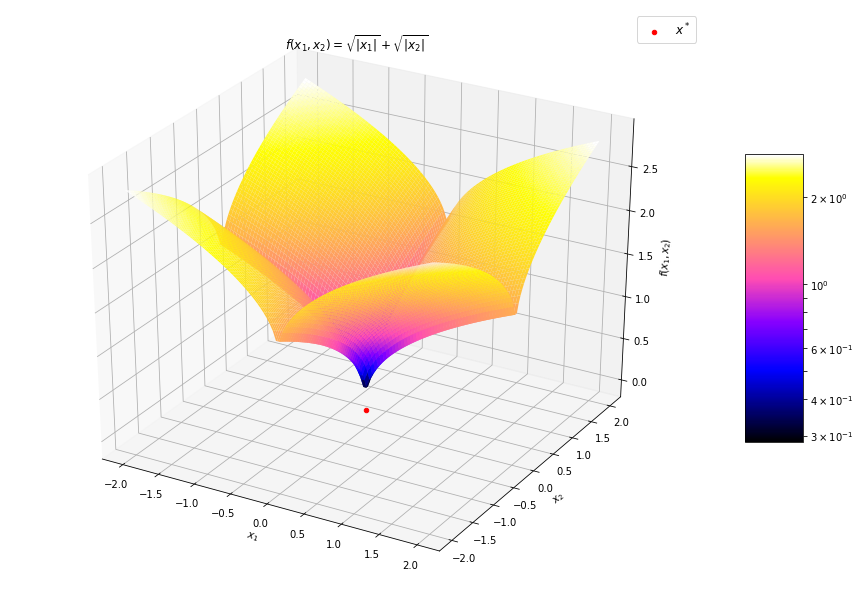

In [5]:
plot_2d_solution_space(unimodal_but_not_convex_example,
                       xmin=-2*np.ones(2),
                       xmax=2*np.ones(2),
                       xstar=np.zeros(2),
                       title=r"$f(x_1, x_2) = \sqrt{|x_1|} + \sqrt{|x_2|}$")

In [6]:
plot_2d_contour_solution_space(unimodal_but_not_convex_example,
                               xmin=-2*np.ones(2),
                               xmax=2*np.ones(2),
                               xstar=np.zeros(2),
                               title=r"$f(x_1, x_2) = \sqrt{|x_1|} + \sqrt{|x_2|}$")

## Benchmarks

Here are some famous benchmarks:

* [COCO (COmparing Continuous Optimisers)](http://coco.gforge.inria.fr/)
* [B-BOB](http://deap.readthedocs.io/en/master/tutorials/advanced/benchmarking.html) (see also its [github repository](https://github.com/DEAP/deap))

## Test functions for optimization

The following pages contain a lot of test functions for optimization:
* https://en.wikipedia.org/wiki/Test_functions_for_optimization
* http://www-optima.amp.i.kyoto-u.ac.jp/member/student/hedar/Hedar_files/TestGO.htm
* https://www.cs.cmu.edu/afs/cs/project/jair/pub/volume24/ortizboyer05a-html/node6.html
* http://benchmarkfcns.xyz/fcns
* https://www.sfu.ca/~ssurjano/optimization.html

### Test functions for convex deterministic unconstrained continuous single-objective optimization

#### The sphere function

The Sphere function is a famous **convex** function used to test the performance of optimization algorithms.
This function is very easy to optimize and can be used as a first test to check an optimization algorithm.

$$
f(\boldsymbol{x}) = \sum_{i=1}^{n} x_{i}^2
$$

Global minimum:
$$
f(\boldsymbol{0}) = 0
$$

Search domain:
$$
\boldsymbol{x} \in \mathbb{R}^n
$$

In [7]:
def sphere(x):
    r"""The Sphere function.
    
    Example: single 2D point
    ------------------------
    
    To evaluate $x = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$:
    
    >>> sphere( np.array([0, 0]) )
    0.0
    
    The result should be $f(x) = 0$.
    
    Example: single 3D point
    ------------------------
    
    To evaluate $x = \begin{pmatrix} 1 \\ 1 \\ 1 \end{pmatrix}$:
    
    >>> sphere( np.array([1, 1, 1]) )
    3.0
    
    The result should be $f(x) = 3.0$.
    
    Example: multiple 2D points
    ---------------------------
    
    To evaluate $x_1 = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$,
    $x_2 = \begin{pmatrix} 1 \\ 1 \end{pmatrix}$ and
    $x_3 = \begin{pmatrix} 2 \\ 2 \end{pmatrix}$ at once:
    
    >>> sphere( np.array([[0, 1, 2], [0, 1, 2]]) )
    array([   0.,    2.,  8.])
    
    The result should be $f(x_1) = 0$, $f(x_2) = 1$ and $f(x_3) = 8$.
    
    Parameters
    ----------
    x : array_like
        One dimension Numpy array of the point at which the Sphere function is to be computed
        or a two dimension Numpy array of points at which the Sphere function is to be computed.

    Returns
    -------
    float or array_like
        The value(s) of the Sphere function for the given point(s) `x`.
    """
    return sum(x**2.0)

Remark: `sum(x**2.0)` is equivalent to `np.sum(x**2.0, axis=0)`

In [8]:
plot_2d_solution_space(sphere,
                       xmin=-2*np.ones(2),
                       xmax=2*np.ones(2),
                       xstar=np.zeros(2),
                       angle_view=(55, 83),
                       title="Sphere function")

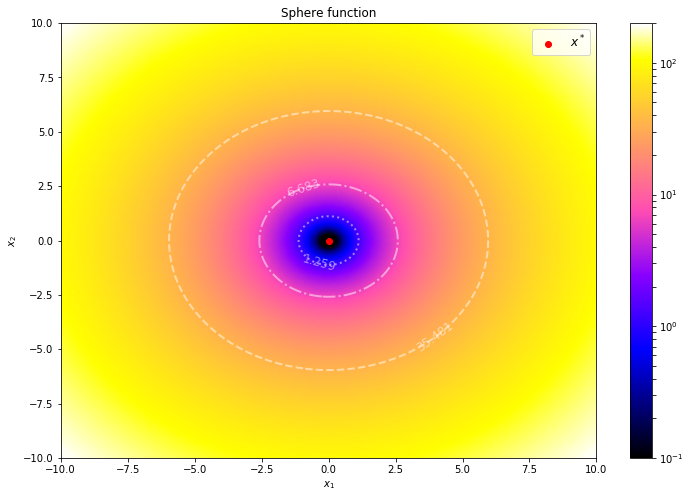

In [9]:
plot_2d_contour_solution_space(sphere,
                               xmin=-10*np.ones(2),
                               xmax=10*np.ones(2),
                               xstar=np.zeros(2),
                               title="Sphere function")

### Test functions for non-convex deterministic unconstrained continuous single-objective optimization

#### The (extended) Rosenbrock function

The Rosenbrock function is a famous **non-convex** function used to test the performance of optimization algorithms. The classical two-dimensional version of this function is **unimodal** but its *extended* $n$-dimensional version (with $n \geq 4$) is **multimodal** [[ref.](http://www.mitpressjournals.org/doi/abs/10.1162/evco.2006.14.1.119)].

$$
f(\boldsymbol{x}) = \sum_{i=1}^{n-1} \left[100 \left( x_{i+1} - x_{i}^{2} \right)^{2} + \left( x_{i} - 1 \right)^2 \right]
$$

Global minimum:
$$
\min =
\begin{cases}
    n = 2 & \rightarrow \quad f(1,1) = 0, \\
    n = 3 & \rightarrow \quad f(1,1,1) = 0, \\
    n > 3 & \rightarrow \quad f(\underbrace{1,\dots,1}_{n{\text{ times}}}) = 0 \\
\end{cases}
$$

Search domain:
$$
\boldsymbol{x} \in \mathbb{R}^n
$$

The Rosenbrock has exactly one (global) minimum $(\underbrace{1, \dots, 1}_{n{\text{ times}}})^\top$ for $n \leq 3$ and an additional *local* minimum for $n \geq 4$ near $(-1, 1, 1, \dots, 1)^\top$.

See http://www.mitpressjournals.org/doi/abs/10.1162/evco.2006.14.1.119 (freely available at http://dl.acm.org/citation.cfm?id=1118014) and https://en.wikipedia.org/wiki/Rosenbrock_function#Multidimensional_generalisations for more information.

**TODO** read and check the above article and get the exact value of the local minimum if it exists.

See https://en.wikipedia.org/wiki/Rosenbrock_function and http://mathworld.wolfram.com/RosenbrockFunction.html for more information.

The Rosenbrock function, its derivative (i.e. gradient) and its hessian matrix are also implemented in Scipy
([scipy.optimize.rosen](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.rosen.html#scipy.optimize.rosen),
[scipy.optimize.rosen_der](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.rosen_der.html#scipy.optimize.rosen_der),
[scipy.optimize.rosen_hess](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.rosen_hess.html#scipy.optimize.rosen_hess) and 
[scipy.optimize.rosen_hess_prod](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.rosen_hess_prod.html#scipy.optimize.rosen_hess_prod)).
See [Scipy documentation](https://docs.scipy.org/doc/scipy/reference/optimize.html#rosenbrock-function) for more information.

In [10]:
def rosen(x):
    r"""The Rosenbrock function.
    
    Example: single 2D point
    ------------------------
    
    To evaluate $x = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$:
    
    >>> rosen( np.array([0, 0]) )
    1.0
    
    The result should be $f(x) = 1$.
    
    Example: single 3D point
    ------------------------
    
    To evaluate $x = \begin{pmatrix} 1 \\ 1 \\ 1 \end{pmatrix}$:
    
    >>> rosen( np.array([1, 1, 1]) )
    0.0
    
    The result should be $f(x) = 0$.
    
    Example: multiple 2D points
    ---------------------------
    
    To evaluate $x_1 = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$,
    $x_2 = \begin{pmatrix} 1 \\ 1 \end{pmatrix}$ and
    $x_3 = \begin{pmatrix} 2 \\ 2 \end{pmatrix}$ at once:
    
    >>> rosen( np.array([[0, 1, 2], [0, 1, 2]]) )
    array([   1.,    0.,  401.])
    
    The result should be $f(x_1) = 1$, $f(x_2) = 0$ and $f(x_3) = 401$.
    
    Parameters
    ----------
    x : array_like
        One dimension Numpy array of the point at which the Rosenbrock function is to be computed
        or a two dimension Numpy array of points at which the Rosenbrock function is to be computed.

    Returns
    -------
    float or array_like
        The value(s) of the Rosenbrock function for the given point(s) `x`.
    """
    return sum(100.0*(x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0)

In [11]:
scipy.optimize.rosen(np.array([1, 1, 1, 1]))

0.0

In [12]:
scipy.optimize.rosen_der(np.array([1, 1, 1, 1]))

array([0, 0, 0, 0])

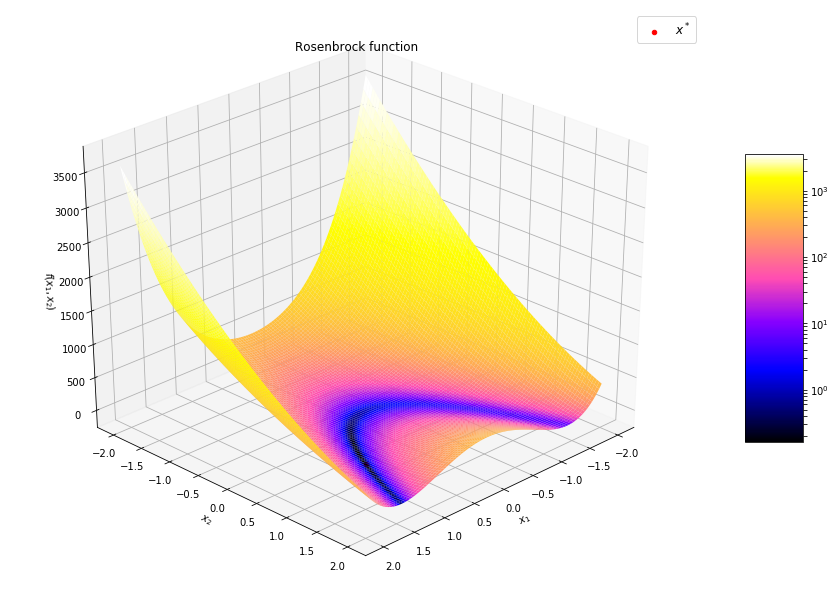

In [13]:
plot_2d_solution_space(rosen,              # scipy.optimize.rosen
                       xmin=-2*np.ones(2),
                       xmax=2*np.ones(2),
                       xstar=np.ones(2),
                       angle_view=(30, 45),
                       title="Rosenbrock function")

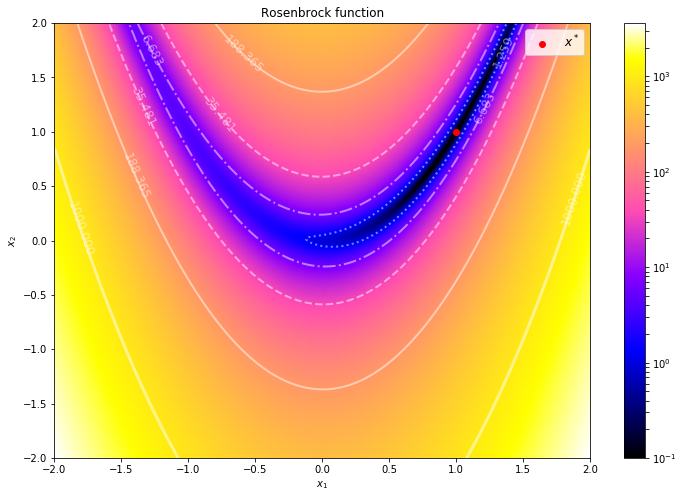

In [14]:
plot_2d_contour_solution_space(rosen,   # scipy.optimize.rosen
                               xmin=-2*np.ones(2),
                               xmax=2*np.ones(2),
                               xstar=np.ones(2),
                               title="Rosenbrock function")

#### The Himmelblau's function

The Himmelblau's function is a two-dimensional **multimodal** function.

$$
f(x_1, x_2) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2
$$

The function has four global minima:
$$
\begin{eqnarray}
    f(3, 2) = 0 \\
    f(-2.805118, 3.131312) = 0 \\
    f(-3.779310, -3.283186) = 0 \\
    f(3.584428, -1.848126) = 0
\end{eqnarray}
$$

Search domain:
$$
\boldsymbol{x} \in \mathbb{R}^2
$$

It also has one local maximum at $f(-0.270845, -0.923039) = 181.617$.

The locations of all the minima can be found analytically (roots of cubic polynomials) but expressions are somewhat complicated.

The function is named after David Mautner Himmelblau, who introduced it in *Applied Nonlinear Programming* (1972), McGraw-Hill, ISBN 0-07-028921-2.

See https://en.wikipedia.org/wiki/Himmelblau%27s_function for more information.

In [15]:
def himmelblau(x):
    r"""The Himmelblau's function.
    
    Example: single point
    ---------------------
    
    To evaluate $x = \begin{pmatrix} 3 \\ 2 \end{pmatrix}$:
    
    >>> himmelblau( np.array([3, 2]) )
    0.0
    
    The result should be $f(x) = 1$.
    
    Example: multiple points
    ------------------------
    
    To evaluate $x_1 = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$,
    $x_2 = \begin{pmatrix} 1 \\ 1 \end{pmatrix}$ and
    $x_3 = \begin{pmatrix} 2 \\ 2 \end{pmatrix}$ at once:
    
    >>> himmelblau( np.array([[0, 1, 2], [0, 1, 2]]) )
    array([ 170.,  106.,   26.])
    
    The result should be $f(x_1) = 170$, $f(x_2) = 106$ and $f(x_3) = 26$.
    
    Parameters
    ----------
    x : array_like
        One dimension Numpy array of the point at which the Himmelblau's function is to be computed
        or a two dimension Numpy array of points at which the Himmelblau's function is to be computed.

    Returns
    -------
    float or array_like
        The value(s) of the Himmelblau's function for the given point(s) `x`.
    """
    assert x.shape[0] == 2, x.shape
    return (x[0]**2.0 + x[1] - 11.0)**2.0 + (x[0] + x[1]**2.0 - 7.0)**2.0

In [16]:
himmelblau( np.array([0, 0]) )

170.0

In [17]:
himmelblau( np.array([[0, 1, 2], [0, 1, 2]]) )

array([ 170.,  106.,   26.])

In [18]:
himmelblau(np.array([[3., 2.], [-2.805118, 3.131312]]).T)

array([  0.00000000e+00,   1.09892967e-11])

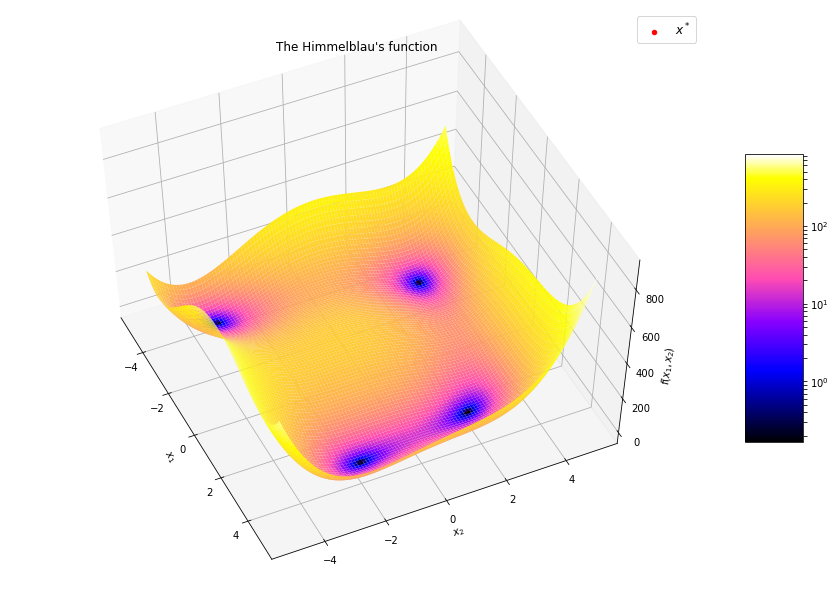

In [19]:
plot_2d_solution_space(himmelblau,
                       xmin=-5*np.ones(2),
                       xmax=5*np.ones(2),
                       xstar=np.array([[3., 2.], [-2.805118, 3.131312], [-3.779310, -3.283186], [3.584428, -1.848126]]).T,
                       angle_view=(55, -25),
                       title="The Himmelblau's function")

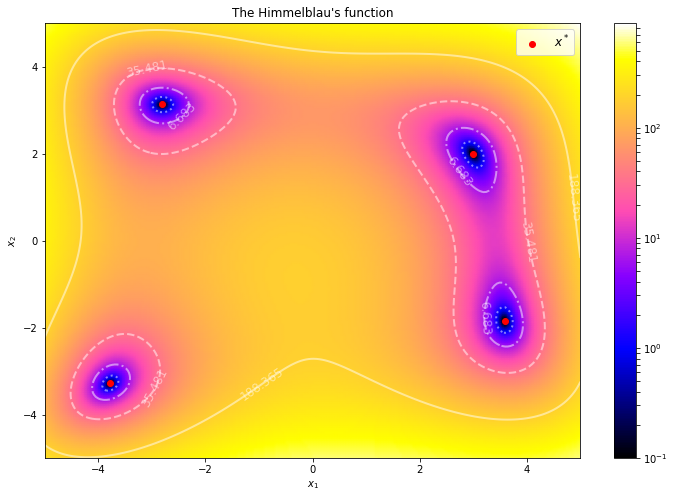

In [20]:
plot_2d_contour_solution_space(himmelblau,
                               xmin=-5*np.ones(2),
                               xmax=5*np.ones(2),
                               xstar=np.array([[3., 2.], [-2.805118, 3.131312], [-3.779310, -3.283186], [3.584428, -1.848126]]).T,
                               title="The Himmelblau's function")

#### The Rastrigin function

The Rastrigin function is a famous **multimodal** function.
Finding the minimum of this function is a fairly difficult problem due to its large search space and its large number of local minima.

The classical two-dimensional version of this function has been introduced by L. A. Rastrigin in *Systems of extremal control* Mir, Moscow (1974).

Its *generalized* $n$-dimensional version has been proposed by H. Mühlenbein, D. Schomisch and J. Born in *The Parallel Genetic Algorithm as Function Optimizer* Parallel Computing, 17, pages 619–632, 1991.

On an n-dimensional domain it is defined by:

$$
f(\boldsymbol{x}) = An + \sum_{i=1}^{n} \left[ x_{i}^{2} - A \cos(2 \pi x_{i}) \right]
$$
where $A = 10$.

Global minimum:
$$
f(\boldsymbol{0}) = 0
$$

Search domain:
$$
\boldsymbol{x} \in \mathbb{R}^n
$$

See https://en.wikipedia.org/wiki/Rastrigin_function for more information.

In [21]:
def rastrigin(x):
    r"""The Rastrigin function.
    
    Example: single 2D point
    ------------------------
    
    To evaluate $x = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$:
    
    >>> rastrigin( np.array([0, 0]) )
    0.0
    
    The result should be $f(x) = 0$.
    
    Example: single 3D point
    ------------------------
    
    To evaluate $x = \begin{pmatrix} 1 \\ 1 \\ 1 \end{pmatrix}$:
    
    >>> rastrigin( np.array([0, 0, 0]) )
    0.0
    
    The result should be $f(x) = 0$.
    
    Example: multiple 2D points
    ---------------------------
    
    To evaluate $x_1 = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$,
    $x_2 = \begin{pmatrix} 1 \\ 1 \end{pmatrix}$ and
    $x_3 = \begin{pmatrix} 2 \\ 2 \end{pmatrix}$ at once:
    
    >>> rastrigin( np.array([[0, 1, 2], [0, 1, 2]]) )
    array([   1.,    0.,  401.])
    
    The result should be $f(x_1) = 1$, $f(x_2) = 0$ and $f(x_3) = 401$.
    
    Parameters
    ----------
    x : array_like
        One dimension Numpy array of the point at which the Rastrigin function is to be computed
        or a two dimension Numpy array of points at which the Rastrigin function is to be computed.

    Returns
    -------
    float or array_like
        The value(s) of the Rastrigin function for the given point(s) `x`.
    """
    A = 10.
    n = x.shape[0]
    return A * n + sum(x**2.0 - A * np.cos(2.0 * np.pi * x))

In [22]:
rastrigin(np.array([[0, np.pi], [0, np.pi]]))

array([  0.       ,  27.1455743])

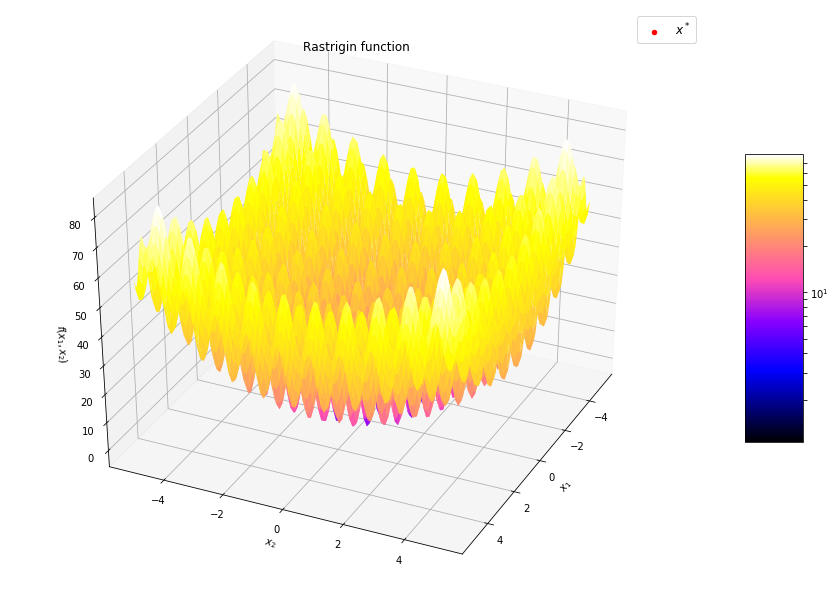

In [23]:
plot_2d_solution_space(rastrigin,
                       xmin=-5.12*np.ones(2),
                       xmax=5.12*np.ones(2),
                       xstar=np.zeros(2),
                       angle_view=(35, 25),
                       title="Rastrigin function")

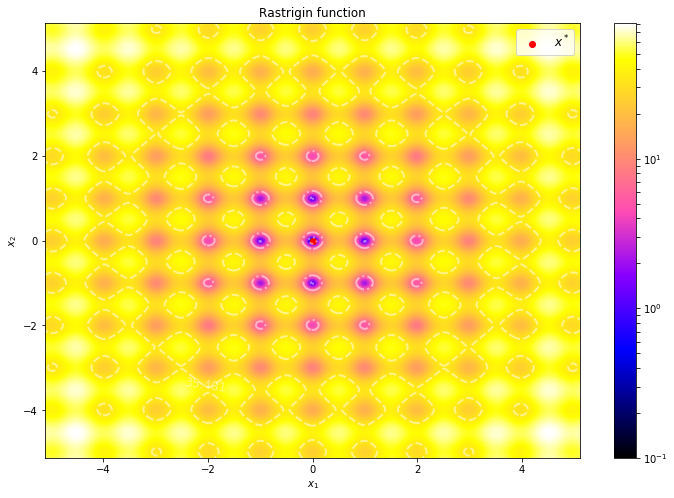

In [24]:
plot_2d_contour_solution_space(rastrigin,
                               xmin=-5.12*np.ones(2),
                               xmax=5.12*np.ones(2),
                               xstar=np.zeros(2),
                               title="Rastrigin function")

#### Shekel function

The Shekel function is a famous **multimodal** function.

The mathematical form of a function in $n$ dimensions with $m$ local minima is:

$$
f(\boldsymbol{x}) = -\sum_{i=1}^{m} \left( \boldsymbol{b}_{i} + \sum_{j=1}^{n} (x_{j} - \boldsymbol{A}_{ji})^{2} \right)^{-1}
$$

Global minimum:
$$
f(\boldsymbol{0}) = 0
$$

Search domain:
$$
\boldsymbol{x} \in \mathbb{R}^n
$$

References: Shekel, J. 1971. *Test Functions for Multimodal Search Techniques* Fifth Annual Princeton Conference on Information Science and Systems.

See https://en.wikipedia.org/wiki/Shekel_function and https://www.sfu.ca/~ssurjano/shekel.html for more information.

#### Easom function

The Easom function is a 2 dimensions **unimodal** function.

$$
f(x_1, x_2) = -\cos(x_1) \cos(x_2) \exp \left( -\left[ (x_1-\pi)^2 + (x_2-\pi)^2 \right] \right)
$$

Global minimum:
$$
f(\pi, \pi) = -1
$$

Search domain:
$$
\boldsymbol{x} \in \mathbb{R}^2
$$

See https://www.sfu.ca/~ssurjano/easom.html for more information.

In [25]:
def easom(x):
    r"""The Easom function.
    
    Example: single 2D point
    ------------------------
    
    To evaluate $x = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$:
    
    >>> easom( np.array([np.pi, np.pi]) )
    -1.0
    
    The result should be $f(x) = -1$.
    
    Example: multiple 2D points
    ---------------------------
    
    To evaluate $x_1 = \begin{pmatrix} \pi \\ \pi \end{pmatrix}$,
    $x_2 = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$ and
    $x_3 = \begin{pmatrix} 1 \\ 1 \end{pmatrix}$ at once:
    
    >>> easom( np.array([[np.pi, 0, 1], [np.pi, 0, 1]]) )
    array([   -1.,    -2.67528799e-09,  -3.03082341e-05])
    
    The result should be $f(x_1) = -1$, $f(x_2) \approx 0$ and $f(x_3) \approx 0$.
    
    Parameters
    ----------
    x : array_like
        One dimension Numpy array of the point at which the Easom function is to be computed
        or a two dimension Numpy array of points at which the Easom function is to be computed.

    Returns
    -------
    float or array_like
        The value(s) of the Easom function for the given point(s) `x`.
    """
    assert x.shape[0] == 2, x.shape
    return -np.cos(x[0]) * np.cos(x[1]) * np.exp(-((x[0]-np.pi)**2.0 + (x[1]-np.pi)**2.0))

In [26]:
easom( np.array([[np.pi, 0, 1], [np.pi, 0, 1]]) )

array([ -1.00000000e+00,  -2.67528799e-09,  -3.03082341e-05])

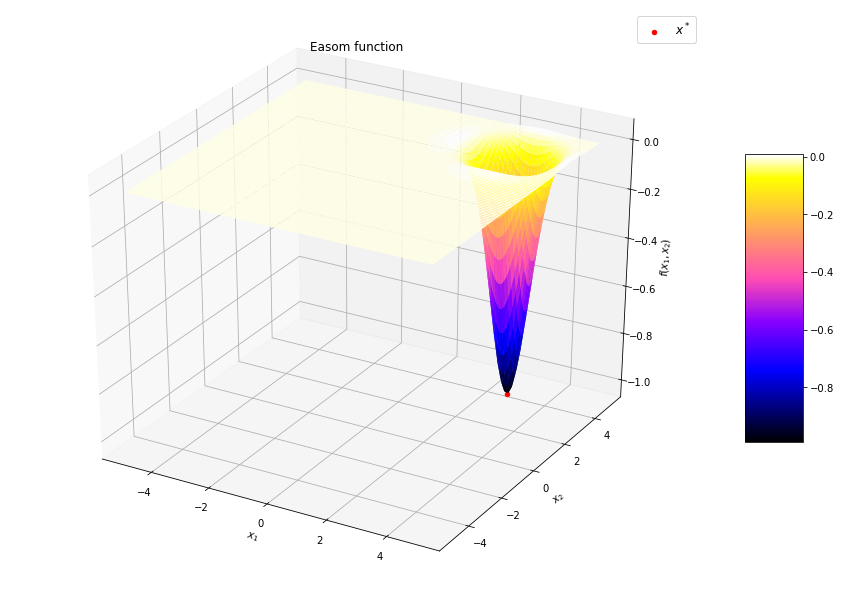

In [27]:
plot_2d_solution_space(easom,
                       xmin=-5*np.ones(2),
                       xmax=5*np.ones(2),
                       xstar=np.ones(2) * np.pi,
                       #angle_view=(35, 25),
                       title="Easom function",
                       zlog=False)

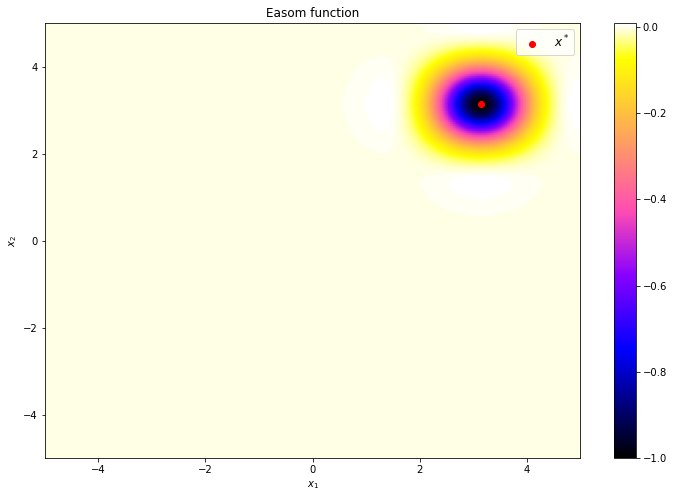

In [28]:
plot_2d_contour_solution_space(easom,
                               xmin=-5*np.ones(2),
                               xmax=5*np.ones(2),
                               xstar=np.ones(2) * np.pi,
                               zlog=False,
                               title="Easom function")

#### Cross-in-tray function

The Cross-in-tray function is a 2 dimensions **multimodal** function, with four global minima. 

$$
f(x_1, x_2) = -0.0001 \left( \left| \sin(x_1) \sin(x_2) \exp \left( \left| 100 - \frac{\sqrt{x_1^2 + x_2^2}}{\pi} \right| \right)\right| + 1 \right)^{0.1}
$$

Global minima:

$$
\text{Min} =
\begin{cases}
    f(1.34941, -1.34941)  &= -2.06261 \\
    f(1.34941, 1.34941)   &= -2.06261 \\
    f(-1.34941, 1.34941)  &= -2.06261 \\
    f(-1.34941, -1.34941) &= -2.06261 \\
\end{cases}
$$

Search domain:
$$
-10 \leq x_1, x_2 \leq 10
$$

**References**: *Test functions for optimization* (Wikipedia): https://en.wikipedia.org/wiki/Test_functions_for_optimization.

In [29]:
def crossintray(x):
    r"""The Cross-in-tray function.
    
    Example: single 2D point
    ------------------------
    
    To evaluate $x = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$:
    
    >>> crossintray( np.array([0, 0]) )
    -0.0001
    
    The result should be $f(x) = -0.0001$.
    
    Example: multiple 2D points
    ---------------------------
    
    To evaluate $x_1 = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$,
    $x_2 = \begin{pmatrix} 1.34941 \\ 1.34941 \end{pmatrix}$ and
    $x_3 = \begin{pmatrix} -1.34941 \\ -1.34941 \end{pmatrix}$ at once:
    
    >>> crossintray( np.array([[0, 1.34941, -1.34941], [0, 1.34941, -1.34941]]) )
    array([ -0.0001,    -2.06261,  -2.06261])
    
    The result should be $f(x_1) = -0.0001$, $f(x_2) = -2.06261$ and $f(x_3) = -2.06261$.
    
    Parameters
    ----------
    x : array_like
        One dimension Numpy array of the point at which the Cross-in-tray function is to be computed
        or a two dimension Numpy array of points at which the Cross-in-tray function is to be computed.

    Returns
    -------
    float or array_like
        The value(s) of the Cross-in-tray function for the given point(s) `x`.
    """
    assert x.shape[0] == 2, x.shape
    return -0.0001 * (np.abs(np.sin(x[0]) * np.sin(x[1]) * np.exp( np.abs( 100.0 - np.sqrt(x[0]**2.0 + x[1]**2.0)/np.pi ))) + 1.0)**0.1

In [30]:
crossintray(np.array([0., 0.]))

-0.0001

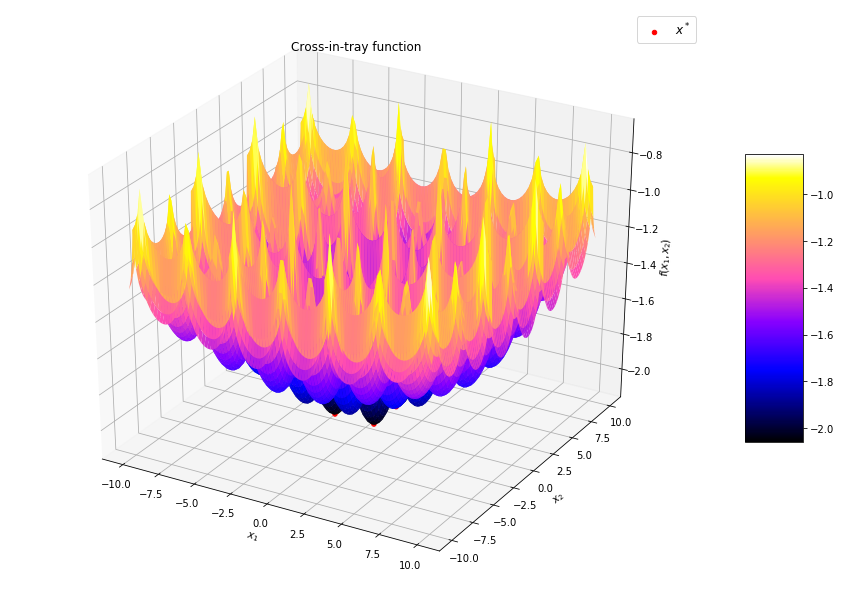

In [31]:
plot_2d_solution_space(crossintray,
                       xmin=-10*np.ones(2),
                       xmax=10*np.ones(2),
                       xstar=np.array([[1.34941, 1.34941, -1.34941, -1.34941], [1.34941, -1.34941, 1.34941, -1.34941]]),
                       #angle_view=(35, 25),
                       title="Cross-in-tray function",
                       zlog=False)

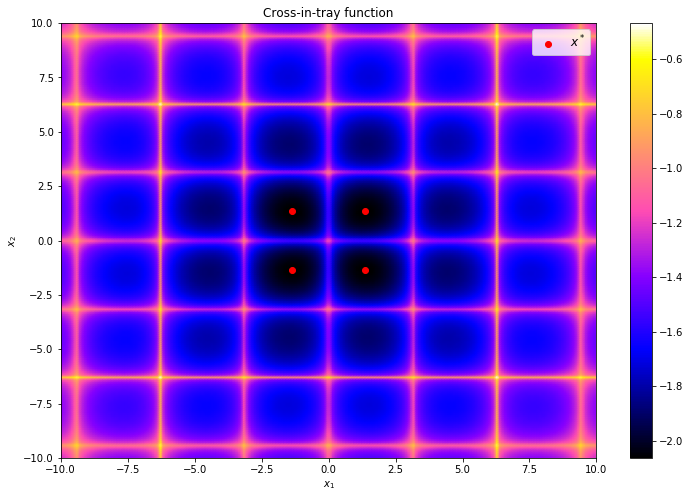

In [32]:
plot_2d_contour_solution_space(crossintray,
                               xmin=-10*np.ones(2),
                               xmax=10*np.ones(2),
                               xstar=np.array([[1.34941, 1.34941, -1.34941, -1.34941], [1.34941, -1.34941, 1.34941, -1.34941]]),
                               title="Cross-in-tray function",
                               #vmin=-2.0,
                               #vmax=-0.5,
                               zlog=False)

#### Hölder table function

The Hölder table function is a 2 dimensions **multimodal** function, with four global minima. 

$$
f(x_1, x_2) = 
-\left| \sin(x_1) \cos(x_2) \exp \left( \left| 1 - \frac{\sqrt{x_1^2 + x_2^2}}{\pi} \right| \right) \right|
$$

Global minima:
$$
\text{Min} = 
\begin{cases}
    f(8.05502, 9.66459)   &= -19.2085 \\
    f(-8.05502, 9.66459)  &= -19.2085 \\
    f(8.05502, -9.66459)  &= -19.2085 \\
    f(-8.05502, -9.66459) &= -19.2085
\end{cases}
$$

Search domain:
$$
-10 \leq x_1, x_2 \leq 10
$$

**References**: *Test functions for optimization* (Wikipedia): https://en.wikipedia.org/wiki/Test_functions_for_optimization.

In [33]:
def holder(x):
    r"""The Hölder table function.
    
    Example: single 2D point
    ------------------------
    
    To evaluate $x = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$:
    
    >>> holder( np.array([0, 0]) )
    0.0
    
    The result should be $f(x) = 0$.
    
    Example: multiple 2D points
    ---------------------------
    
    To evaluate $x_1 = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$,
    $x_2 = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$ and
    $x_3 = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$ at once:
    
    >>> holder( np.array([[0., 0., 1.], [0., 1., 0.]]) )
    array([-0. , -0. , -1.66377043])
    
    The result should be $f(x_1) = 0$, $f(x_2) = 0$ and $f(x_3) = -1.66377043$.
    
    Parameters
    ----------
    x : array_like
        One dimension Numpy array of the point at which the Hölder table function is to be computed
        or a two dimension Numpy array of points at which the Hölder table function is to be computed.

    Returns
    -------
    float or array_like
        The value(s) of the Hölder table function for the given point(s) `x`.
    """
    assert x.shape[0] == 2, x.shape
    return -np.abs(np.sin(x[0]) * np.cos(x[1]) * np.exp(np.abs(1.0 - np.sqrt(x[0]**2.0 + x[1]**2.0)/np.pi )))

In [34]:
holder(np.array([[0., 0., 2.], [0., 1., 2.]]))

array([-0.        , -0.        , -0.41806579])

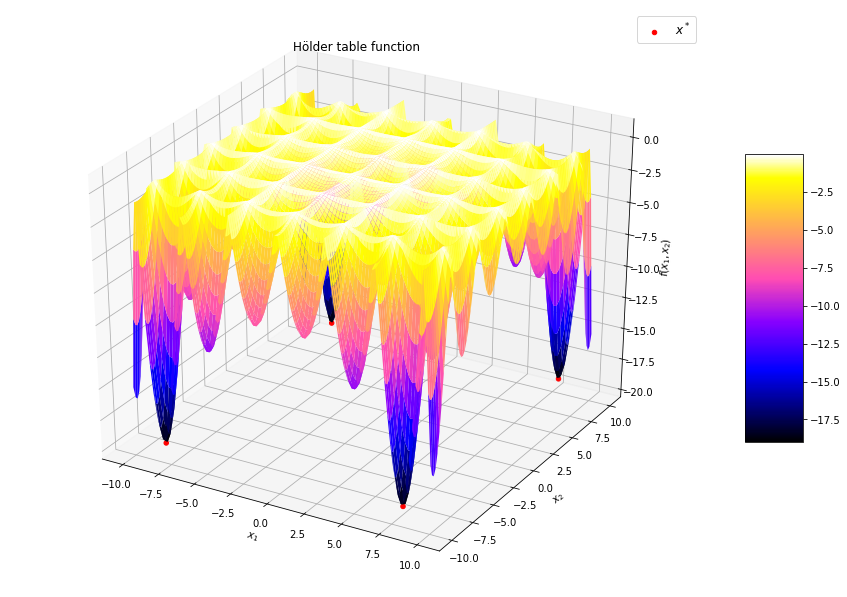

In [35]:
plot_2d_solution_space(holder,
                       xmin=-10.*np.ones(2),
                       xmax=10.*np.ones(2),
                       xstar=np.array([[8.05502, 8.05502, -8.05502, -8.05502], [9.66459, -9.66459, 9.66459, -9.66459]]),
                       #angle_view=(35, 25),
                       title="Hölder table function",
                       zlog=False)

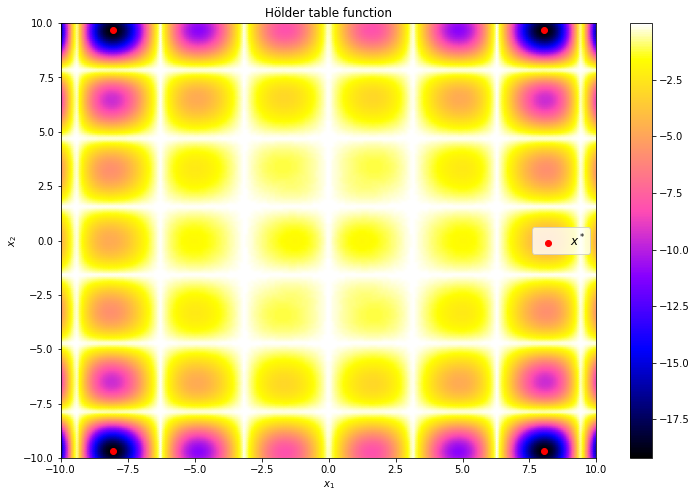

In [36]:
plot_2d_contour_solution_space(holder,
                               xmin=-10*np.ones(2),
                               xmax=10*np.ones(2),
                               xstar=np.array([[8.05502, 8.05502, -8.05502, -8.05502], [9.66459, -9.66459, 9.66459, -9.66459]]),
                               zlog=False,
                               title="Hölder table function")

### Test functions for constrained optimization

### Test functions for multi-objective optimization

## Combinatorial problems

Here is a list of some famous combinatorial problems:
* The [travelling salesman problem ("TSP")](https://en.wikipedia.org/wiki/Traveling_salesman_problem)
* The [minimum spanning tree problem ("MST")](https://en.wikipedia.org/wiki/Minimum_spanning_tree)
* The [knapsack problem](https://en.wikipedia.org/wiki/Knapsack_problem)
* The [boolean satisfiability problem ("SAT")](https://en.wikipedia.org/wiki/Boolean_satisfiability_problem)

https://en.wikipedia.org/wiki/Combinatorial_optimization